### Importing libraries

In [77]:
import torch # Model operations
import numpy as np # Scientific computing
import matplotlib.pyplot as plt # Plotting
import pandas as pd # Handling tabular data
from sklearn.model_selection import train_test_split # train/validation/test set division

### Loading Data

In [78]:
df = pd.read_csv("framingham.csv")

### Gaining More Knowledge About Dataset

In [79]:
df.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [81]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


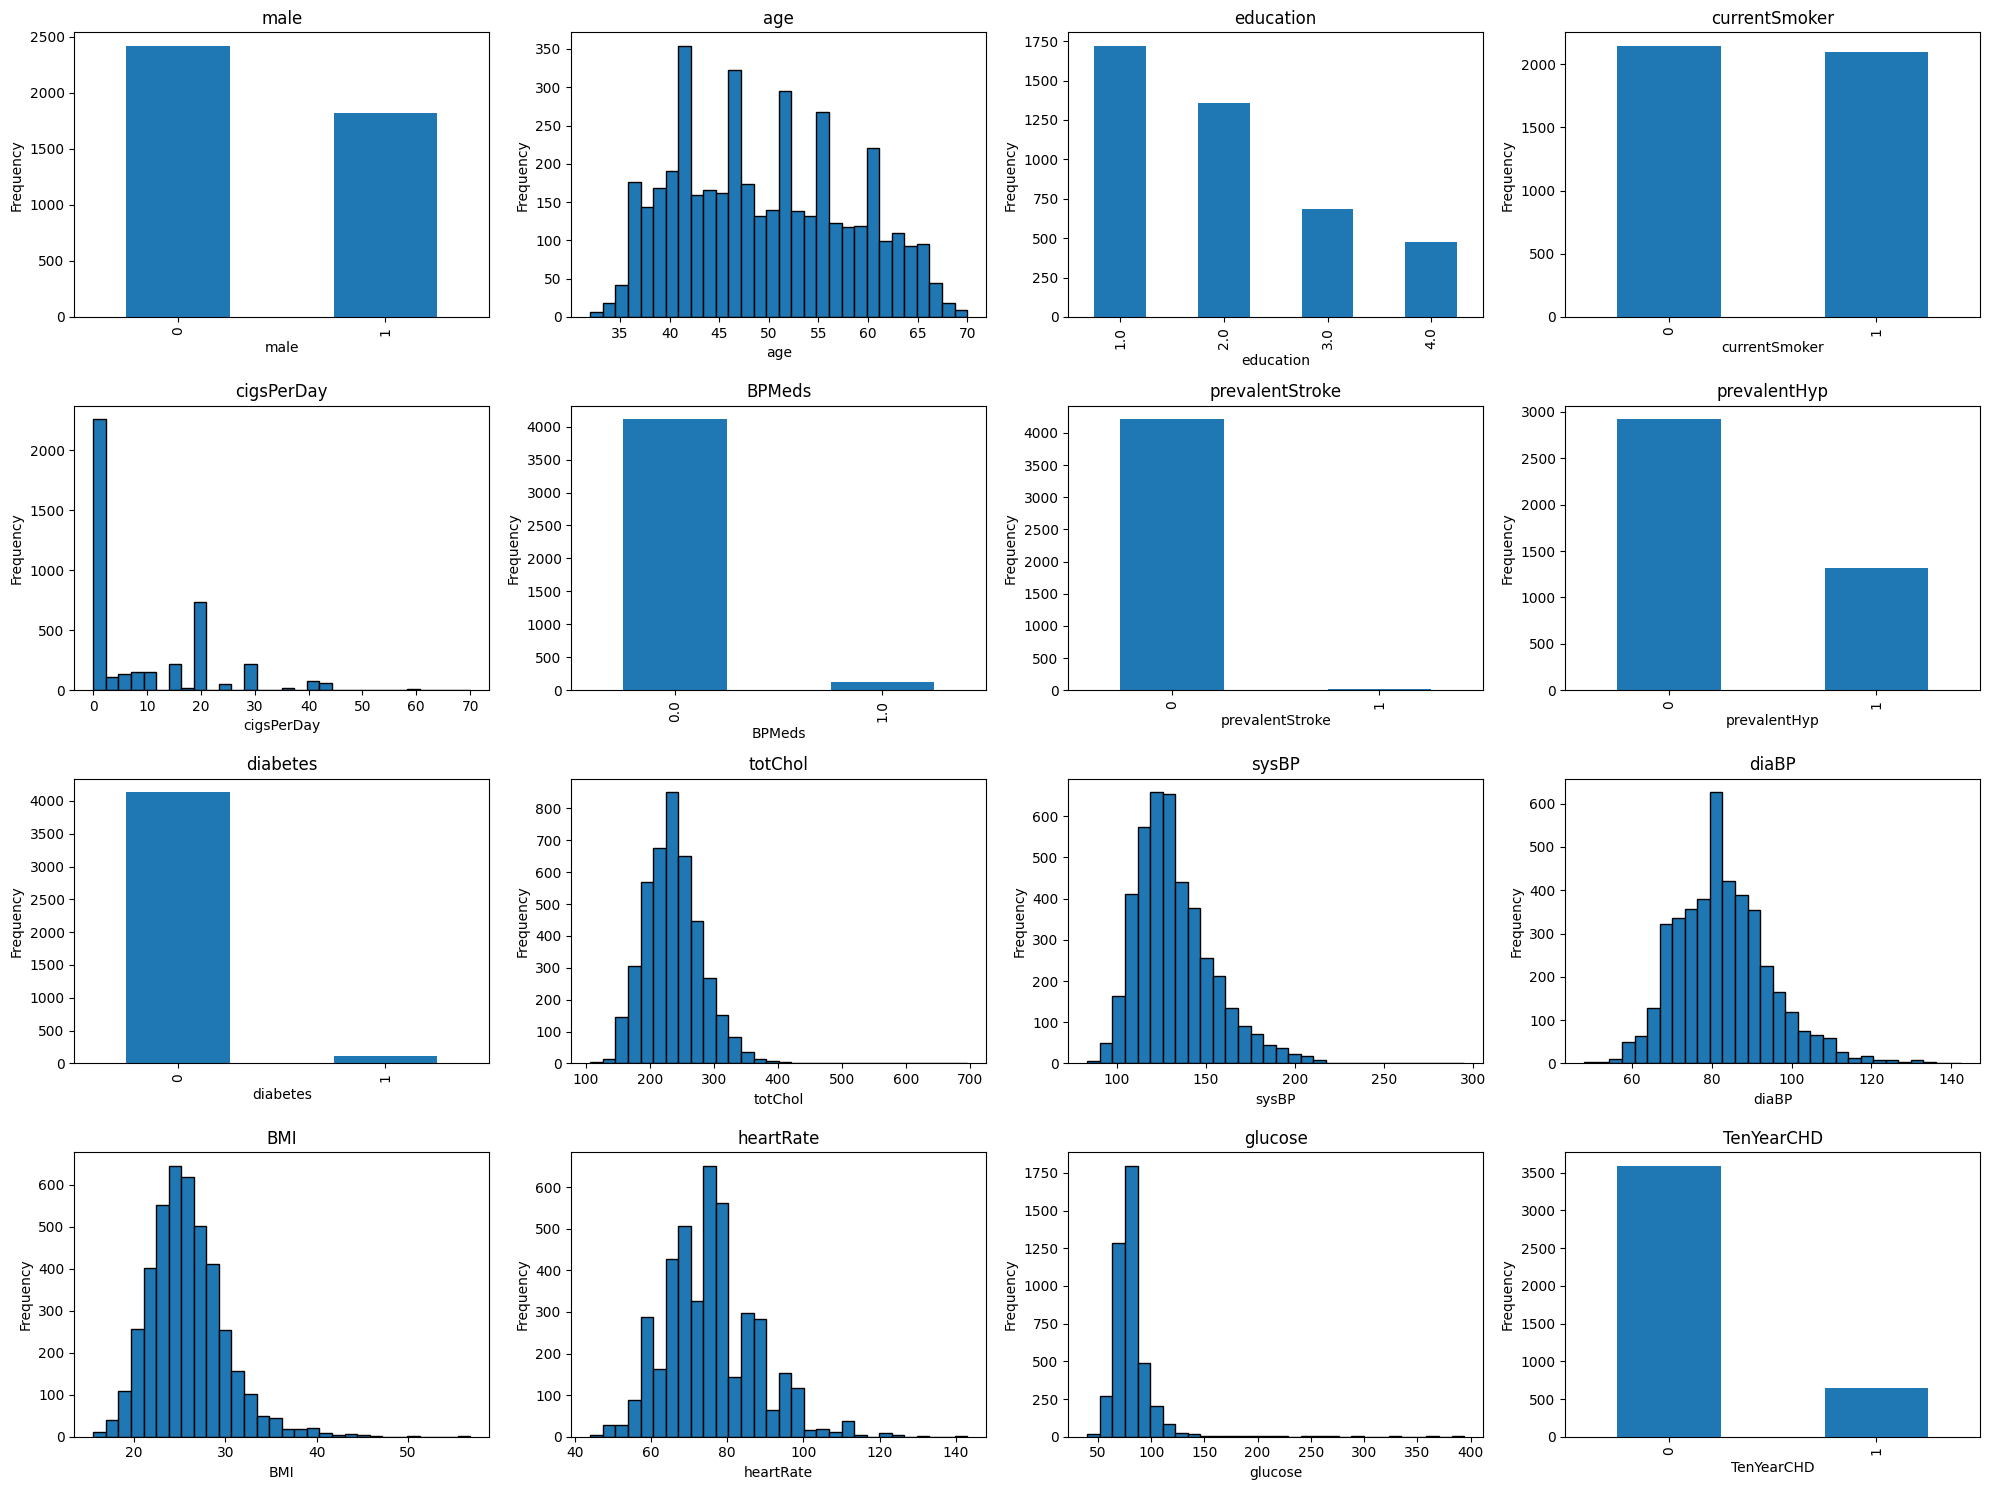

In [106]:
plt.figure(figsize=(20, 15))

for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)
    if df[column].nunique() == 2 or column == "education":
        df[column].value_counts().plot(kind='bar', title=column)
    else:
        df[column].plot(kind='hist', title=column, bins=30, edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Continous features. Let's see if there are lots of outliers.

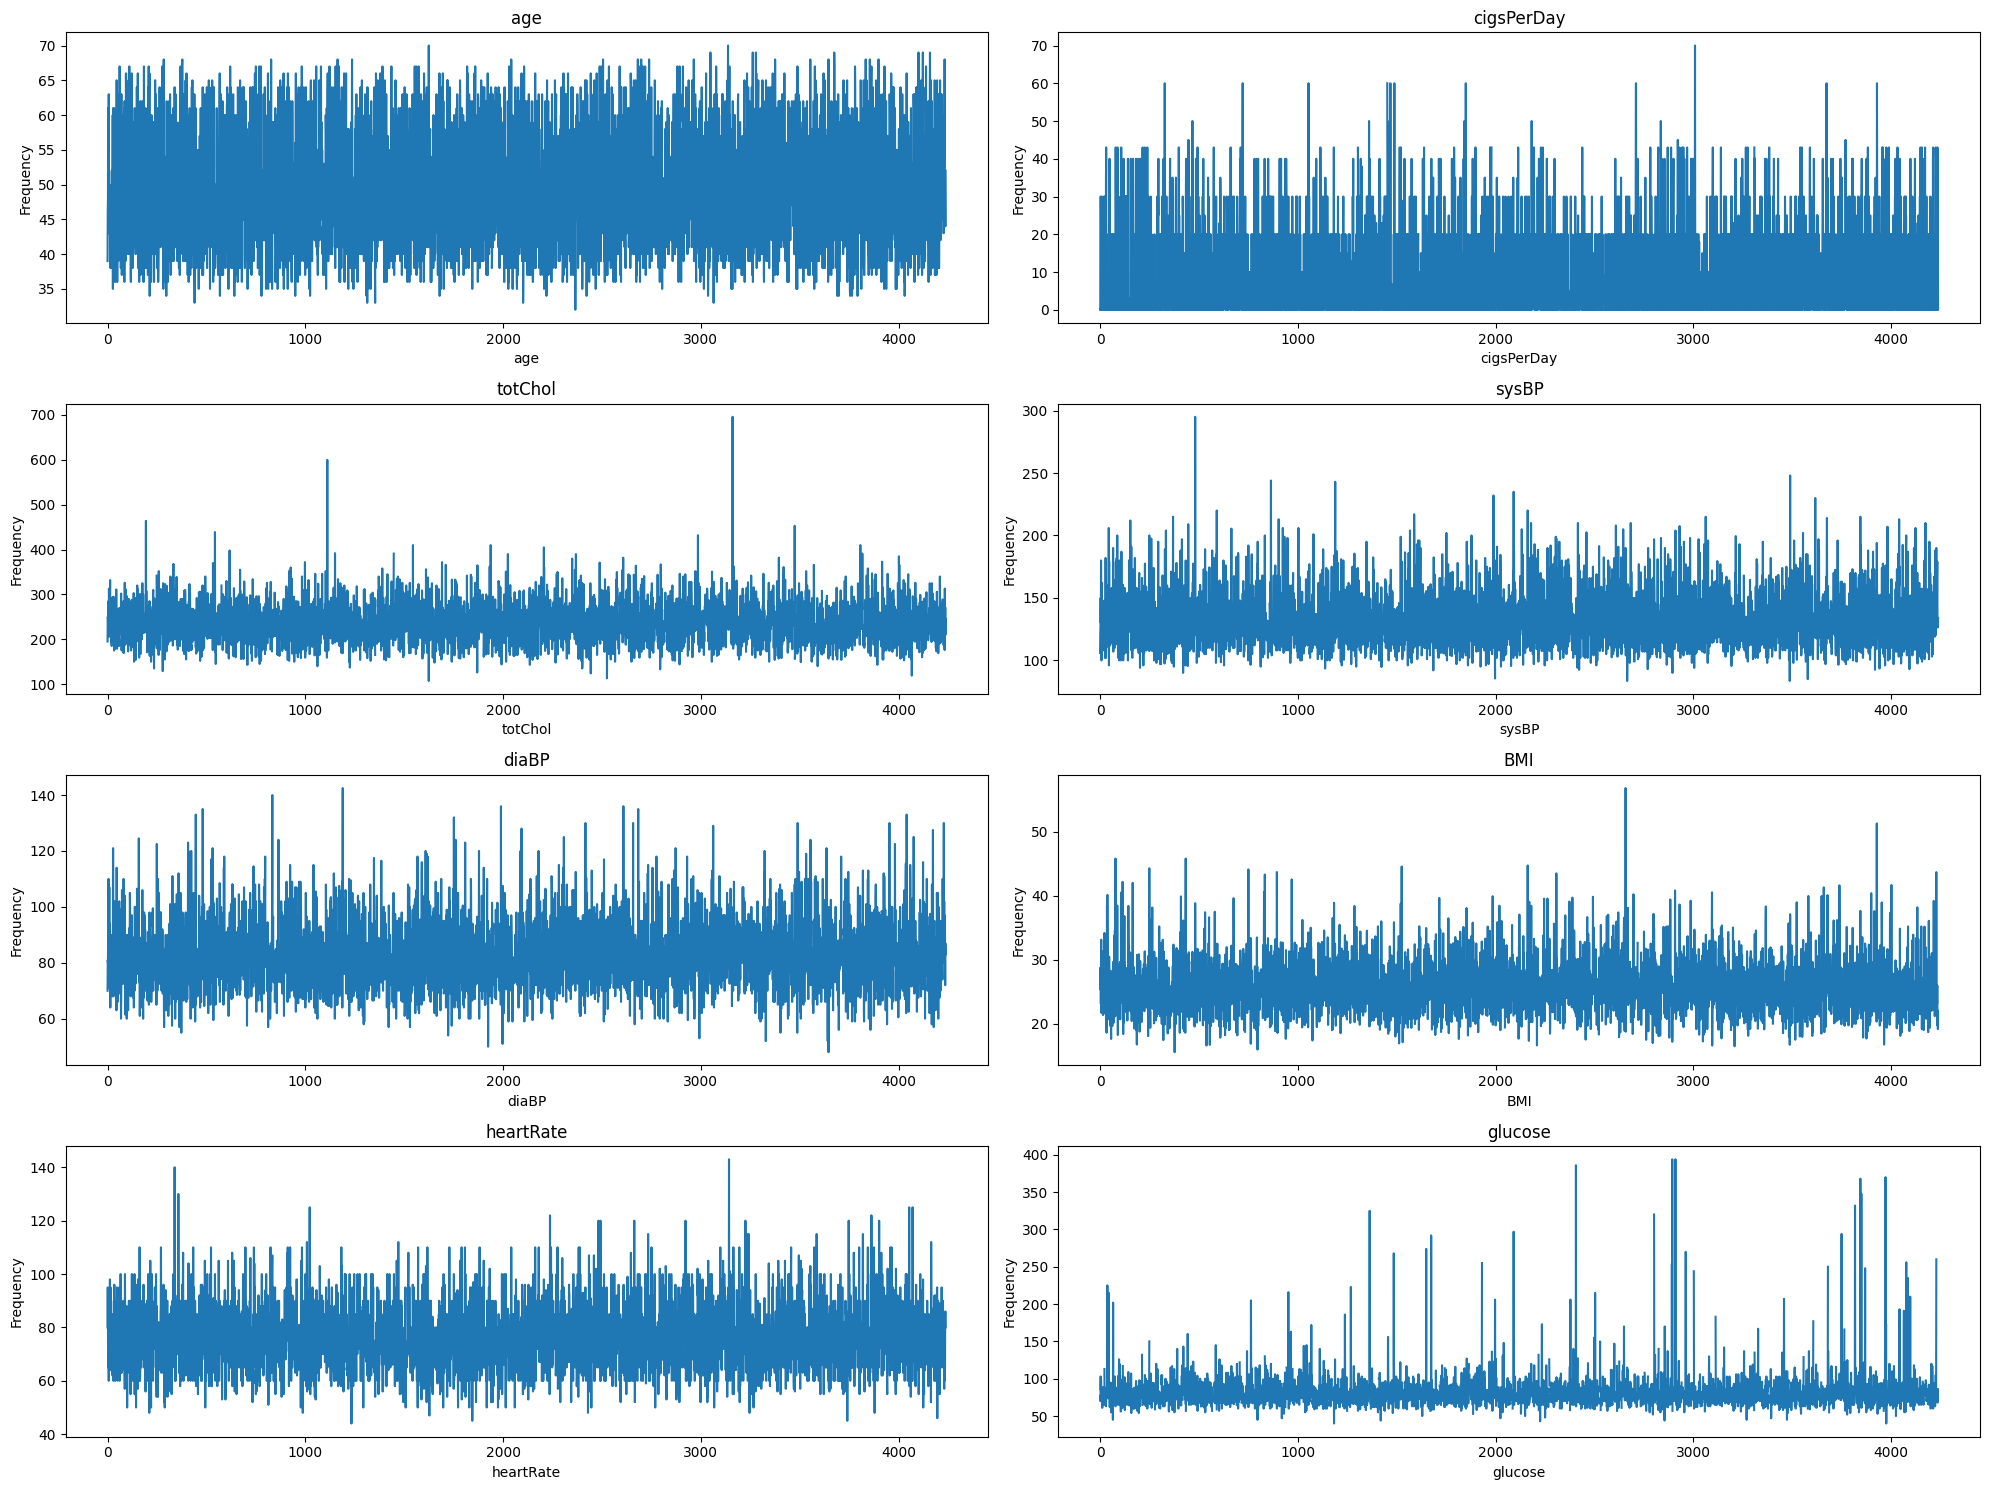

In [83]:
plt.figure(figsize=(20, 15))

for i, column in enumerate(df[["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]], 1):
    plt.subplot(4, 2, i)
    df[column].plot(title=column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Data Cleaning

You can see that some values are null. You could remove rows which include missing values, but I decided to fill such values in every column by the column median value, instead of mean, since continous variables has significant number of outliers, what we can deduct from plots above.

See how many missing values has the "education" column

In [84]:
df["education"].isna().sum()

105

Filling missing values with median of the column

In [85]:
for column in df.columns:
    if df[column].isnull().any():
        df[column] = df[column].fillna(df[column].median())

Check if filling operation succeeded

In [86]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.979471,0.494101,8.941482,0.029259,0.005899,0.310524,0.025720,236.689476,132.352407,82.893464,25.800205,75.878716,81.603587,0.151958
std,0.495022,8.572160,1.007081,0.500024,11.902399,0.168552,0.076587,0.462763,0.158316,44.327427,22.038097,11.910850,4.071041,12.025185,22.865246,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### Set Up Features and Labels

In [87]:
target = "TenYearCHD"

x = torch.tensor(df[[column for column in df.columns if column != target]].to_numpy())
y = torch.tensor(df[target]).reshape(-1, 1)

print(x[0])
print(y[0])

tensor([  1.0000,  39.0000,   4.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000, 195.0000, 106.0000,  70.0000,  26.9700,  80.0000,
         77.0000], dtype=torch.float64)
tensor([0])


### Feature Normalization

Perform min-max scaling. Consequently our values ranges from 0 to 1 and differences in ranges of values are not distorted like in standardization.

In [88]:
def normalize(x):
    x_min = x.min(0, keepdim=True).values
    x_max = x.max(0, keepdim=True).values
    x_normalized = (x - x_min) / (x_max - x_min)
    return x_normalized

In [89]:
x = normalize(x)
x[:3]

tensor([[1.0000, 0.1842, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.1494, 0.1064, 0.2328, 0.2770, 0.3636, 0.1045],
        [0.0000, 0.3684, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.2428, 0.1773, 0.3492, 0.3197, 0.5152, 0.1017],
        [1.0000, 0.4211, 0.0000, 1.0000, 0.2857, 0.0000, 0.0000, 0.0000, 0.0000,
         0.2343, 0.2080, 0.3386, 0.2375, 0.3131, 0.0847]], dtype=torch.float64)

### Train/Validation/Test Set Division

Applying random_state=42 parameter for reproducibility

In [90]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [91]:
x.shape, y.shape

(torch.Size([4238, 15]), torch.Size([4238, 1]))

In [92]:
x_train.shape, y_train.shape

(torch.Size([2966, 15]), torch.Size([2966, 1]))

In [93]:
x_val.shape, y_val.shape

(torch.Size([636, 15]), torch.Size([636, 1]))

In [94]:
x_test.shape, y_test.shape

(torch.Size([636, 15]), torch.Size([636, 1]))

### Creating a Model

In [103]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_size, 1)
        
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

In [104]:
input_size = x.shape[0]
model = LogisticRegression(input_size)
loss_calculation = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
history = []